# Example 1

In this example we will show how to load a new dataset that will be used to train a ML model and to
define a new statistic that will be used in the classification.

In [1]:
#Let's load the MeSsI package
library('MeSsI')

Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: nortest
Loading required package: cosmoFns
Loading required package: mclust
Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: e1071
Loading required package: beepr
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin

Loading required package: progress


[1] "Welcome to MeSsI v2.0"

_________________________________111_¶1___________
________________________________1¶¶¶¶¶¶¶¶1________
_______________________________¶¶¶¶¶111¶¶¶¶¶1_____
_______________________________¶¶¶¶¶¶¶¶¶¶¶¶¶1_____
_______________________________¶¶¶¶¶¶¶1_1¶¶_______
______________________________¶¶¶11¶____¶¶________
________________________1¶¶¶1¶¶¶___¶1_1¶¶¶________
_____________________1¶¶¶¶¶¶¶¶¶¶¶_¶¶¶¶¶___________
___________________¶¶¶¶1_¶¶¶1¶1¶¶¶¶¶¶¶1___________
_______________1¶¶¶¶¶¶¶111¶11111¶¶¶¶¶¶____________
_____________¶¶¶¶___1¶¶¶¶¶¶11111¶¶¶¶¶1____________
_____________¶¶__1¶¶1__¶¶111111111¶¶¶_____________
_____________1¶1__¶¶___¶¶111111111¶¶______________
______________1¶¶_1¶___¶¶1¶1¶111¶¶¶¶1_____________
________________¶¶_¶¶__¶¶_11111¶¶¶¶_¶¶¶¶¶¶¶¶¶¶¶1__
_________________¶¶¶¶¶¶¶¶¶¶11¶¶¶¶¶111¶¶¶¶¶¶¶¶¶1___
___________________¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶_______1¶¶______
_____________________¶¶1¶¶¶¶¶¶¶¶¶_________________
____________________¶¶____1¶¶____1________________
__

In [2]:
# Let's load the dataset that will be used to train the ML model
data(GalaxiesTrainingset)
str(GalaxiesTrainingset)

'data.frame':	63066 obs. of  27 variables:
 $ ngroup     : int  8889819 8889819 8889819 8889819 8889819 8889819 8889819 8889819 8889819 8889819 ...
 $ ra         : num  234 234 234 234 234 ...
 $ dec        : num  13.9 13.9 13.9 13.9 13.8 ...
 $ z          : num  0.0248 0.0227 0.0246 0.0257 0.025 ...
 $ mag        : num  17.4 16.6 17.6 17.4 17 ...
 $ color      : num  0.744 0.73 0.717 0.734 0.782 ...
 $ delta      : num  0.884 0.952 1.26 1.47 2.832 ...
 $ delta2     : num  0.884 0.952 1.26 1.47 2.832 ...
 $ sw_gal     : num  0.594 0.956 0.323 0.502 0.176 ...
 $ sf_gal     : num  0.8058 0.7983 0.3628 0.608 0.0947 ...
 $ ad_gal     : num  0.793 0.825 0.253 0.543 0.151 ...
 $ cvm_gal    : num  0.901 0.824 0.247 0.674 0.153 ...
 $ lillie_gal : num  0.936 0.866 0.222 0.556 0.104 ...
 $ pearson_gal: num  0.849 0.221 0.221 0.221 0.221 ...
 $ Delta      : num  1.68 1.68 1.68 1.68 1.68 ...
 $ pval_ds    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ngal       : int  118 118 118 118 118 118 118 118 118 118 

In [3]:
# As this dataset already contain some features, we will elimite them and kept only
#   the observational information of the galaxies.

data <- GalaxiesTrainingset[,(1:6)]
colnames(data)[1] <- 'id' # The flag indicating to which cluster each galaxy belong must be named 'id'
str(data)

'data.frame':	63066 obs. of  6 variables:
 $ id   : int  8889819 8889819 8889819 8889819 8889819 8889819 8889819 8889819 8889819 8889819 ...
 $ ra   : num  234 234 234 234 234 ...
 $ dec  : num  13.9 13.9 13.9 13.9 13.8 ...
 $ z    : num  0.0248 0.0227 0.0246 0.0257 0.025 ...
 $ mag  : num  17.4 16.6 17.6 17.4 17 ...
 $ color: num  0.744 0.73 0.717 0.734 0.782 ...


In [4]:
# Let's define a new function that estimates our statistic
# This function must have as an input a data.frame with the properties of the galaxies that belong
# to a cluster.

UserFeatureFunction <- function(group){
  return(ad.test(group$z*300000.)$p.val)
}


In [5]:
# Let's make a list with the name of the functions that estimates each feature.
# THE FIRST 6 LINES ARE THE DEFAULT FUNCTIONS, IN THE LAST LINE WE ADDED OUR NEW FUNCTION.
featuresFunctions <- list(ngalFunction, colorFunction, mag_maxFunction, 
                         gap_magFunction, DresslerShectmanTest, 
                         DresslerShectmanTest2, DresslerShectmanPval,
                         DresslerShectmanIter, shapiro.testGroup, sf.testGroup,
                         ad.testGroup, cvm.testGroup,
                         lillie.testGroup, pearson.testGroup,
                         UserFeatureFunction)

# Now er must create a vector with the names of the features that each function estimate.
#  AGAINS IN THE LAST LINE IS THE NAME OF THE NEW FEATURE
featuresNames <- c('ngal', 'color', 'mag_max', 'gap_mag', 'Delta', 'Delta2',
                  'pval_ds', 'ind', 'pval_sw', 'pval_sf', 'pval_ad',
                  'pval_cvm', 'pval_lillie','pval_pearson',
                  'UserFeature')

In [6]:
# Let's estimate the features that will be used by the classification

ClustersData <- get_cluster_features_new(data, featuresFunctions = featuresFunctions, featuresNames = featuresNames)

[>----------------------------------------------------------------------]   2%

In [10]:
# Let's load the real classification of these systems
data(ClustersTrainingset)
ClustersData$id_mer <- as.factor(ClustersTrainingset$id_mer)

In [11]:
str(ClustersData)

'data.frame':	1031 obs. of  19 variables:
 $ id          : int  8889819 22223897 66623125 22260668 7773693 4442784 88812536 7774812 11154798 44413137 ...
 $ ra          : num  234 122 133 190 131 ...
 $ dec         : num  13.9 15.2 17.9 57 15.4 ...
 $ z           : num  0.0257 0.0841 0.0779 0.0251 0.0254 ...
 $ ngal        : int  118 53 159 109 36 60 60 61 39 214 ...
 $ color       : num  0.695 0.651 0.705 0.702 0.73 ...
 $ mag_max     : num  14.6 15.7 14.9 14.5 15 ...
 $ gap_mag     : num  0.016328 0.640574 0.376802 0.000627 0.050601 ...
 $ Delta       : num  1.675 1.991 1.459 1.404 0.986 ...
 $ Delta2      : num  1.68 1.81 1.42 1.4 1.04 ...
 $ pval_ds     : num  0 0 0.00333 0.00333 0.46 ...
 $ ind         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ pval_sw     : num  0.21706 0.42356 0.48599 0.00886 0.28015 ...
 $ pval_sf     : num  0.2551 0.4592 0.6913 0.0284 0.2691 ...
 $ pval_ad     : num  0.0741 0.4152 0.7787 0.0484 0.1603 ...
 $ pval_cvm    : num  0.049 0.327 0.857 0.158 0.163 ...
 $ pval_

In [12]:
# Let's train a random Forest model with this data

dat <- ClustersData[,-c(1,2,3)] # Let's remove the angular coordinates and the id of the cluster.

model <- train(id_mer ~. , 
                      data    = dat, 
                      method  = 'rf', 
                      metric  = 'Accuracy') 

In [14]:
# Now let's load the dataset that we want to analyse

data(GalaxiesTestingset)
data <- GalaxiesTestingset[,(1:6)]
colnames(data)[1] <- 'id' # The flag indicating to which cluster each galaxy belong must be named 'id'
str(data)

'data.frame':	17639 obs. of  6 variables:
 $ id   : int  33337225 33337225 33337225 33337225 33337225 33337225 33337225 33337225 33337225 33337225 ...
 $ ra   : num  179 179 179 179 179 ...
 $ dec  : num  41.5 41.4 41.5 41.4 41.4 ...
 $ z    : num  0.0935 0.0924 0.0954 0.0924 0.0934 ...
 $ mag  : num  17 17.3 16.9 17.7 17.4 ...
 $ color: num  0.739 0.777 0.742 0.731 0.714 ...


In [16]:
# Let's analyse this dataset with the model that we just train.

messi(data, ClustersML = model, folder = 'test')

[1] "Starting the estimation of the galaxy clusters features"


[>----------------------------------------------------------------------]   2%

[1] "Starting the estimation of the galaxy features"


[1] "Starting the classification of the galaxy clusters"


Warning message in if (ClustersML == "defaultClustersModel") {:
“la condición tiene longitud > 1 y sólo el primer elemento será usado”

[1] "Starting the estimation of the substructures"
[1] "Using default Model"


[1] "The program delay 18.4385333333333 minutes"


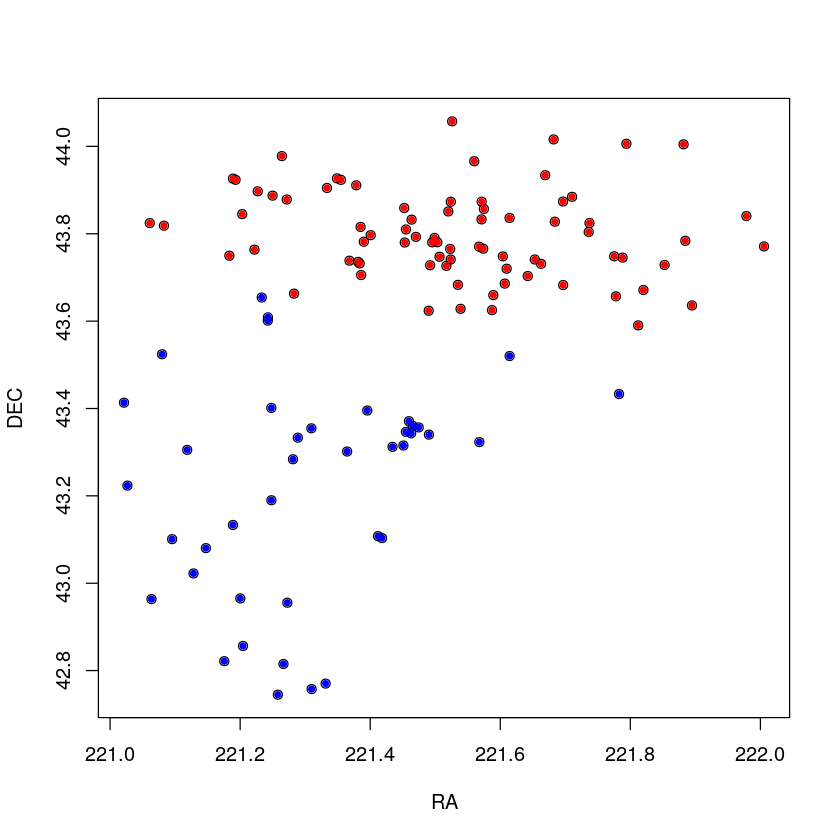

In [22]:
# Let's plot an example of a merging cluster

cluster       <- read.table('test/merging_clusters/44410156_galaxies.dat', header = TRUE)
substructure1 <- subset(cluster, cluster$SubId == 1)
substructure2 <- subset(cluster, cluster$SubId == 2)

plot(cluster$ra, cluster$dec, xlab = 'RA', ylab = 'DEC')
points(substructure1$ra, substructure1$dec, pch = 20, col = 'red')
points(substructure2$ra, substructure2$dec, pch = 20, col = 'blue')

In [23]:
# Now let's load the output of the messi function and the real class of these clusters

ClustersData <- read.table('test/clustersOutput.dat', header = TRUE)
data(ClustersTestingset)
ClustersData$id_mer <- as.factor(ClustersTestingset$id_mer)

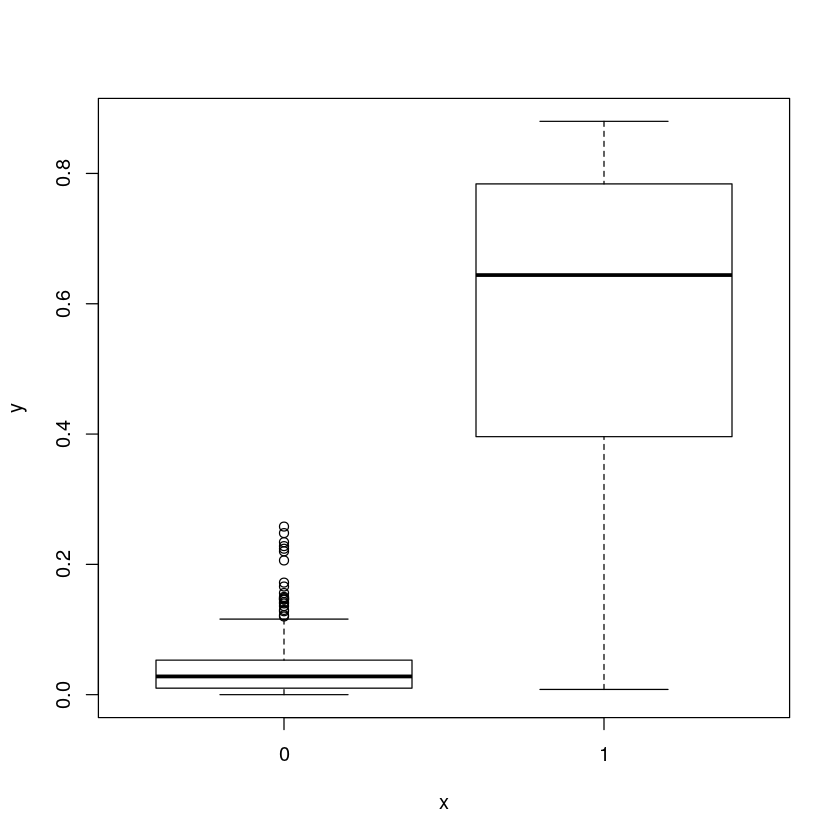

In [24]:
# Let's plot the probability of being in merger vs the real class

plot(ClustersData$id_mer, ClustersData$merProb)